# **CS 475: Machine Learning, Fall 2022**
# **Homework 2, Lab (15 points)**

**Instructions:**
This notebook is intended to guide you through a classification task using SVMs. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). There are 3 questions. For each question, you are expected to write code to train SVM models, plot figures using the plot helper function (plot_svm_kernel), and then interprete the figures. 

<!-- The objective of this notebook is to provide a brief introduction to support vector machines (SVMs) and explore their advantages and disadvantages in classification and regression problems. -->

In [ ]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Getting the data

We are using the sklearn.datasets.make_moons for building a dataset for the svm. And, have a quick look at the data.

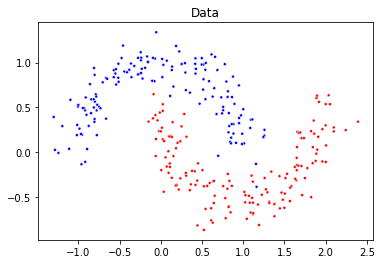

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.15, random_state=0, n_samples=300)
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, edgecolors='k', marker='.').set_title("Data")
plt.show()

In [ ]:
# Plotting helpers. Please read following function carefully, since you will use this funcion for plotting the later results

#     Visualizes the SVM model given the various outputs. It plots:
#    * All the data point, color coded by class: blue or red
#    * The support vectors, indicated by circling the points with a black border. 
#      If the dual coefficients are known (only for kernel SVMs) if paints support vectors with high coefficients darker
#    * The decision function as a blue-to-red gradient. It is white where the decision function is near 0.
#    * The decision boundary as a full line, and the SVM margins (-1 and +1 values) as a dashed line
#
#
def plot_svm_kernel(X, y, title, support_vectors, decision_function, dual_coef=None, show=True):
    """
    Attributes:
    X -- The training data
    y -- The correct labels
    title -- The plot title
    support_vectors -- the list of the coordinates of the support vectores
    decision_function - The decision function returned by the SVM
    dual_coef -- The dual coefficients of all the support vectors (not relevant for LinearSVM)
    show -- whether to plot the figure already or not
    """
    # plot the line, the points, and the nearest vectors to the plane
    # plt.figure(fignum, figsize=(5, 5))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr, marker='.')
    if dual_coef is not None:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c=dual_coef[0, :],
                    s=70, edgecolors='k', zorder=10, marker='.', cmap=plt.cm.bwr)
    else:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none',
                    s=70, edgecolors='k', zorder=10, marker='.', cmap=plt.cm.bwr)
    plt.axis('tight')
    x_min, x_max = -1.5, 2.5
    y_min, y_max = -1.0, 1.5

    XX, YY = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]
    Z = decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
    plt.pcolormesh(XX, YY, Z, vmin=-1, vmax=1, cmap=plt.cm.bwr, alpha=0.1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())

    if show:
        plt.show()

#**Question 1: Linear SVMs (3 points)**

In this question, you should train a LinearSVC using default loss and C=0.001. Then, use the plotting fucntion provided above to plot your results. 

Using the given function, the plot should show the predictions for the linear SVM. The background color should show the prediction (blue or red). The full line should show the decision boundary, and the dashed line the margin. The encircled points should show the support vectors.


In [ ]:
#TODO: write code to meet aforementioned question requirements
#Hint: you could use class sklearn.SVC from sklearn library for the code.
#You can use the "support_vectors_" and "decision_function" in the sklearn.SVC object
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
clf = svm.SVC(C=0.001, kernel='linear')
clf.fit(X, y)
support_vectors = clf.support_vectors_
decision_function = clf.decision_function

#TODO: Put your plots here: 

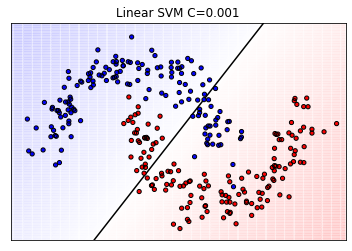

In [ ]:
plot_svm_kernel(X, y, "Linear SVM C=0.001", support_vectors, decision_function, dual_coef=None, show=True)

#TODO: write your interpretation here (hint: does the model fit the data well? how about the support vectors?)

----------------------------------
The model doesn't fit the data well. It is too simple and is under-fitting to the data. There are a lot of misclassified data points and all the data points are support vectors, which means that the every data point is within the margin. The regularization is strong because C is really small. The decision function is simple with low accuracy.
----------------------------------


#**Question 2: SVMs with different kernels （5 points）**

#TODO 
Train a SVM with three different kernels (linear, polynomial and RBF) and C = 1.0. Especially for RBF kernel, kernel coefficient value (gamma) is set to 2.0. Plot the results for each kernel with “plot_svm_kernel” function (3 figures expected). 

Using the given function, the plots should show the predictions made for the different kernels. The background color should show the prediction (blue or red). The full line should show the decision boundary, and the dashed line the margin. The encircled points should show the support vectors.

In [ ]:
#TODO: write code to meet aforementioned question requirements
clf_linear = svm.SVC(C=1, kernel='linear').fit(X, y)
clf_poly = svm.SVC(C=1, kernel='poly').fit(X, y)
clf_RBF = svm.SVC(C=1, kernel='rbf').fit(X, y)
#Hint: you could use class sklearn.svm from sklearn library

#TODO: Put your plots here 

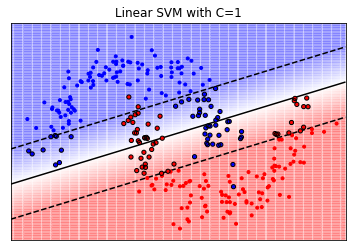

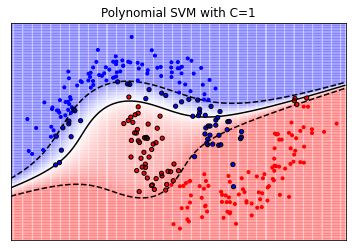

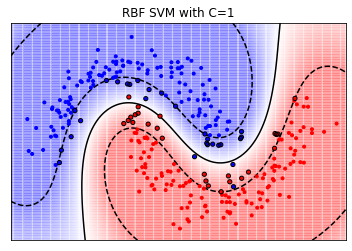

In [ ]:
plot_svm_kernel(X, y, "Linear SVM with C=1",clf_linear.support_vectors_, clf_linear.decision_function, dual_coef=None, show=True)
plot_svm_kernel(X, y, "Polynomial SVM with C=1",clf_poly.support_vectors_, clf_poly.decision_function, dual_coef=None, show=True)
plot_svm_kernel(X, y, "RBF SVM with C=1",clf_RBF.support_vectors_, clf_RBF.decision_function, dual_coef=None, show=True)

#TODO: write your interpretation here (hint: does the model fit the data well? how about the support vectors?)

Performance wise, RBF>Polynomial>Linear SVM in terms of fit. Specifically, linear model and polynomial model are both poor fits to the data. There are too many support vectors in these two model. RBF SVM correctly captures the seperations of the data with a reasonable small number of support vectors.

#**Question 3: Visualizing the RBF models and hyperparameter space（7 points）**

#TODO
Try 3 very different values for C and gamma (for both values, using [1e-3,1,1e3] in this lab). For each of the 9 combinations, create the same RBF plot as before to understand what the model is doing. In particualr, first create a standard train-test split, train the model using the training data, report the train and test accuracy, and then create the RBF plot using the training data. Explain the performance results. When are you over/underfitting? Can you see this in the train and test accuracy?

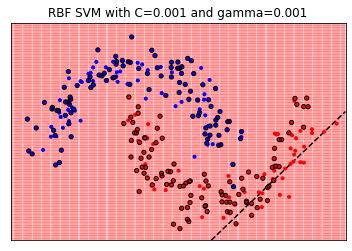

model train accuracy is:  0.5238095238095238
model test accuracy is:  0.4444444444444444



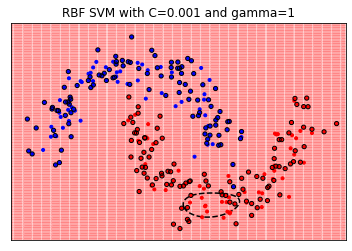

model train accuracy is:  0.5238095238095238
model test accuracy is:  0.4444444444444444



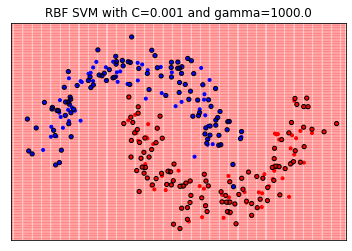

model train accuracy is:  0.5238095238095238
model test accuracy is:  0.4444444444444444



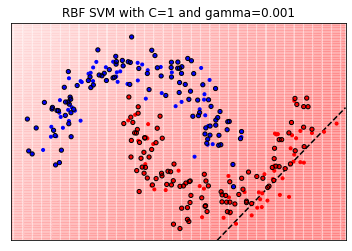

model train accuracy is:  0.5238095238095238
model test accuracy is:  0.4444444444444444



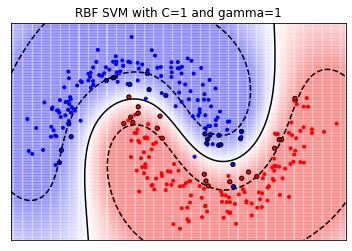

model train accuracy is:  0.9857142857142858
model test accuracy is:  0.9888888888888889



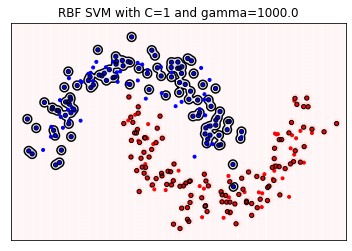

model train accuracy is:  1.0
model test accuracy is:  0.6888888888888889



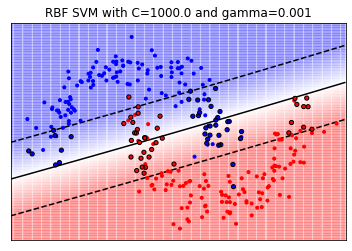

model train accuracy is:  0.8476190476190476
model test accuracy is:  0.8777777777777778



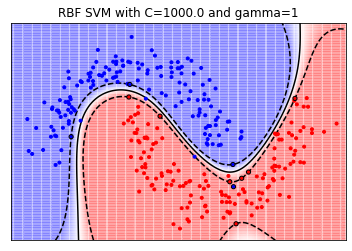

model train accuracy is:  0.9952380952380953
model test accuracy is:  0.9777777777777777



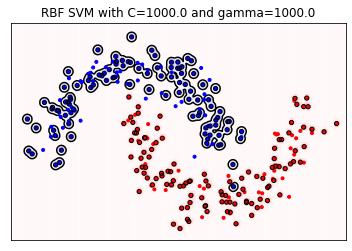

model train accuracy is:  1.0
model test accuracy is:  0.7111111111111111



In [ ]:
#TODO: write code here to meet abovementioned question requirements 
#Hints: you could use class sklearn.model_selection from sklearn.library for build a standard stratified train-test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

values = [1e-3,1,1e3]
for c in values:
  for g in values:
    clf_RBF = svm.SVC(C=c, gamma=g, kernel='rbf').fit(X_train, y_train)
    y_test_pred = clf_RBF.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_test_pred)

    y_train_pred = clf_RBF.predict(X_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)

    title = "RBF SVM with C=" + str(c) + " and gamma=" + str(g)
    plot_svm_kernel(X, y, title ,clf_RBF.support_vectors_, clf_RBF.decision_function, dual_coef=None, show=True)
    
    print("model train accuracy is: ", train_accuracy)
    print("model test accuracy is: ", test_accuracy)
    print()


#TODO: write your interpretation here (see examples below, refer to your plots when explaining what the model is doing)
C defines how much penalties or weight to assign to the data within the margin. Changing the value C changes how small or large the margin is. The strength of the regularization is inversely proportional to C. 
*   For large C, the margin is small and less misclassification is allowed. There is a higher panalty to misclassification.
*   For small C, the regularization is large and the margin is large with a higher tolerence of missclassification. The decision function is simpler with a lower accuracy.
*   For large gamma, the radius of influence of the support vectors only affect the support vectors themselves, and therefore we see the large overfitting. 
*   For small gamma, the model is limited and cannot capture the shape of the data well. Any support vector could affect the whole training data set, which would result in underfitting.
*   The best performing parameters are C=1, gamma=1, where we don't include too many data within a margin and an intermediate value of gamma that gives a good decision boundary. The model train accuracy is:  0.9857142857142858
model test accuracy is:  0.9888888888888889. Compared to C=1000, gamma=1, there is a slight decreae in train accuracy but a slight increase in test accuracy. Both models perform relatively well.



